# Combine

In [1]:
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
from codes.util import *
from PIL import Image
import matplotlib.image as mpimg
from dataset import get_label

In [2]:
def get_bound(img):
    vmin, vmax = img.min(), img.max()
    bd = max(np.abs(vmin), np.abs(vmax))
    return bd
def channel(img, ax):
    if img.shape[-1] != 3:
        img = img.transpose(1,2,0)
#     print (np.abs(img).mean())
#     img = (img-img.min()) / (img.max()-img.min())
    img = img/np.abs(img).max() + 0.5
    ax.imshow(img)
    ax.axis('off')
def bdshow(img, ax, title): 
    bd = get_bound(img)
    ax.imshow(img.sum(0), cmap='seismic', vmin=-bd, vmax=bd)
    ax.set_title(f'{title}')
    ax.axis('off')
def block_ptb(ptb, k=8, norm=2):    
    res = np.zeros((k,k))
    for r in range(k):
        for c in range(k):   
            tmp = ptb[:,12*r:12*(r+1),12*c:12*(c+1)]
            if norm == 2:                
                res[r][c] = np.sqrt(np.sum(tmp**2))
            else:
                res[r][c] = np.abs(tmp.sum(0)).max()
    return res

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Carolina_Wren_0119_186153.jpg -2.217281814532314
Fox_Sparrow_0062_115056.jpg -2.127543692720235


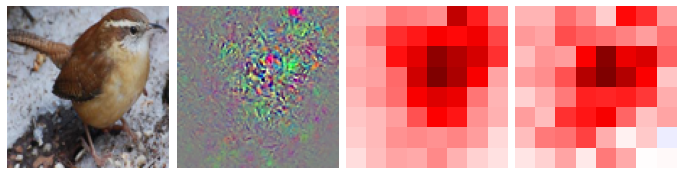

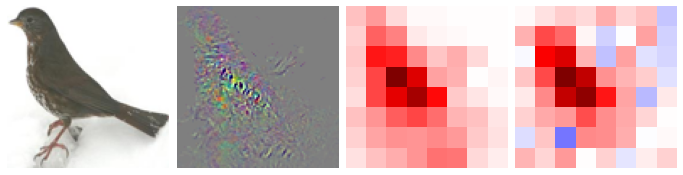

In [4]:
model_type, data_type, attack_type, tgt = 'res18', 'cub', 'l2', 35
csv_root = f'./experiment/attribution_{tgt}/CSV/{attack_type}/{model_type}/{data_type}'
ptb_root = f'./experiment/attribution_{tgt}/Perturb/{attack_type}/{model_type}/{data_type}'
oroot = f'./experiment/attribution_{tgt}/Show/{attack_type}/{model_type}_{data_type}'
mk_dir(oroot)
label_name, label_idx = get_label(f'./data/attribution/stats/{data_type}/{data_type}_list.txt')
for cate in os.listdir(csv_root):
    for img in os.listdir(f'{csv_root}/{cate}'): 
        # if img not in names:
        #     continue
        croot = f'{csv_root}/{cate}/{img}/shap.csv'
        if not os.path.exists(croot):
            continue        
        proot = f'{ptb_root}/{cate}/{img}/ptb.npy'
        iroot = f'./data/attribution/{data_type}/{label_name[int(cate)]}/{img}'
        fig, ax = plt.subplots(1,4, figsize=(12,3))
        im = Image.open(iroot).resize((112,112))
        ax[0].imshow(im)
        ax[0].axis('off')
        ptb = np.load(proot).squeeze()   
        ptb = ptb[:,8:104, 8:104]        
#         bd = get_bound(ptb.sum(0))
#         ax[1].imshow(ptb.sum(0), cmap='seismic', vmin=-bd, vmax=bd)
#         ax[1].axis('off')
        channel(ptb,ax[1])
        draw = block_ptb(ptb,norm=2)          
        bd = get_bound(draw)
        ax[2].imshow(draw, cmap='seismic', vmin=-bd, vmax=bd)
        ax[2].axis('off')
        shap = np.genfromtxt(croot, delimiter=',')[-1,:].reshape(8,8)    
        print (img, shap.sum())
        bd = get_bound(shap)
        ax[3].imshow(-shap, cmap='seismic', vmin=-bd, vmax=bd)
        ax[3].axis('off')
#         print (f'draw {cate} {img}')
        plt.subplots_adjust(wspace=0.05, hspace=0)
        fig.savefig(f'{oroot}/{img[:-4]}.svg',format='svg',bbox_inches='tight',pad_inches = 0,dpi=100)
        # plt.close(fig)      
#     break